In [1]:
from sklearn.model_selection import StratifiedKFold, train_test_split
import numpy as np
import pandas as pd
from category_encoders import woe
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.datasets import fetch_openml

In [2]:
def preprocess_and_split(X, Y, num_fold=10):
    skf = StratifiedKFold(n_splits=num_fold)

    for train_index, test_index in skf.split(X, Y):
        yield train_index, test_index

In [3]:
data = fetch_openml(name='mushroom')

/mnt/sda/boris_stanoev/PropStar/venv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:303: UserWarning: Multiple active versions of the dataset matching the name mushroom exist. Versions may be fundamentally different, returning version 1.
  warn(
/mnt/sda/boris_stanoev/PropStar/venv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
data.data.count()

cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises%3F                  8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  5644
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

In [5]:
data.data.rename(columns={'bruises%3F':'bruises'}, inplace=True)

/tmp/ipykernel_1517165/1557993524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.data.rename(columns={'bruises%3F':'bruises'}, inplace=True)


In [6]:
data.data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
data.data.dtypes

cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [8]:
woe_cols = list(data.data.columns)

# ML test

In [11]:
X = data.data.copy()
y = data.target.copy()

In [12]:
vectorizer = woe.WOEEncoder(cols=woe_cols)
# vectorizer = preprocessing.OneHotEncoder(handle_unknown='ignore')
label_encoder = preprocessing.LabelEncoder()

split_gen = preprocess_and_split(X, y, num_fold=5)

for train_index, test_index in split_gen:
    X_train = X.iloc[train_index, :].copy()
    y_train = y.iloc[train_index].copy()
    X_test = X.iloc[test_index, :].copy()
    y_test = y.iloc[test_index].copy()
    train_y = label_encoder.fit_transform(y_train)
    test_y = label_encoder.transform(y_test)
    
    unique_classes = set(y_test)
    print(f"Unique classes:{unique_classes}")
    # woe_data = [woe_cols].copy()
    
    woe_train_features = vectorizer.fit_transform(X=X_train[woe_cols], y=train_y)
    woe_test_features = vectorizer.transform(X=X_test[woe_cols])
    original_train_df = X_train.copy()
    original_train_df.update(woe_train_features)
    
    original_test_df = X_test.copy()
    original_test_df.update(woe_test_features)
    
    train_x = original_train_df.copy()
    test_x = original_test_df.copy()
    print("model init")
    model = ExtraTreesClassifier(n_estimators=16,
                               random_state=0)
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    predictions_scores = model.predict_proba(test_x)
    
    acc = accuracy_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    print(f'ACC: {acc}')
    print(f'F1: {f1}')
    roc = roc_auc_score(test_y, predictions_scores[:,1])
    print(f'ROC AUC: {roc}')

Unique classes:{'p', 'e'}
model init
ACC: 0.8941538461538462
F1: 0.8767908309455587
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 1.0
F1: 1.0
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 0.9963076923076923
F1: 0.9961538461538463
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 1.0
F1: 1.0
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 0.8694581280788177
F1: 0.879682179341657
ROC AUC: 0.99679272531788


# ML test

In [11]:
X = data.data.copy()
y = data.target.copy()

In [12]:
vectorizer = woe.WOEEncoder(cols=woe_cols)
# vectorizer = preprocessing.OneHotEncoder(handle_unknown='ignore')
label_encoder = preprocessing.LabelEncoder()

split_gen = preprocess_and_split(X, y, num_fold=5)

for train_index, test_index in split_gen:
    X_train = X.iloc[train_index, :].copy()
    y_train = y.iloc[train_index].copy()
    X_test = X.iloc[test_index, :].copy()
    y_test = y.iloc[test_index].copy()
    train_y = label_encoder.fit_transform(y_train)
    test_y = label_encoder.transform(y_test)
    
    unique_classes = set(y_test)
    print(f"Unique classes:{unique_classes}")
    # woe_data = [woe_cols].copy()
    
    woe_train_features = vectorizer.fit_transform(X=X_train[woe_cols], y=train_y)
    woe_test_features = vectorizer.transform(X=X_test[woe_cols])
    original_train_df = X_train.copy()
    original_train_df.update(woe_train_features)
    
    original_test_df = X_test.copy()
    original_test_df.update(woe_test_features)
    
    train_x = original_train_df.copy()
    test_x = original_test_df.copy()
    print("model init")
    model = ExtraTreesClassifier(n_estimators=16,
                               random_state=0)
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    predictions_scores = model.predict_proba(test_x)
    
    acc = accuracy_score(test_y, predictions)
    f1 = f1_score(test_y, predictions)
    print(f'ACC: {acc}')
    print(f'F1: {f1}')
    roc = roc_auc_score(test_y, predictions_scores[:,1])
    print(f'ROC AUC: {roc}')

Unique classes:{'p', 'e'}
model init
ACC: 0.8941538461538462
F1: 0.8767908309455587
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 1.0
F1: 1.0
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 0.9963076923076923
F1: 0.9961538461538463
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 1.0
F1: 1.0
ROC AUC: 1.0
Unique classes:{'p', 'e'}
model init
ACC: 0.8694581280788177
F1: 0.879682179341657
ROC AUC: 0.99679272531788


# Fit/test original columns

In [9]:
X = data.data.copy()
y = data.target.copy()

In [10]:
vectorizer = woe.WOEEncoder(cols=woe_cols)
# vectorizer = preprocessing.OneHotEncoder(handle_unknown='ignore')
label_encoder = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_y = label_encoder.fit_transform(y_train)
test_y = label_encoder.transform(y_test)

unique_classes = set(y_test)
print(f"Unique classes:{unique_classes}")
# woe_data = [woe_cols].copy()

woe_train_features = vectorizer.fit_transform(X=X_train[woe_cols], y=train_y)
woe_test_features = vectorizer.transform(X=X_test[woe_cols])
original_train_df = X_train.copy()
original_train_df.update(woe_train_features)

original_test_df = X_test.copy()
original_test_df.update(woe_test_features)

train_x = original_train_df.copy()
test_x = original_test_df.copy()
print("model init")
model = ExtraTreesClassifier(n_estimators=16,
                           random_state=0)
print(train_x.dtypes)
model.fit(train_x, train_y)
predictions = model.predict(test_x)
predictions_scores = model.predict_proba(test_x)

acc = accuracy_score(test_y, predictions)
f1 = f1_score(test_y, predictions)
print(f'ACC: {acc}')
print(f'F1: {f1}')
roc = roc_auc_score(test_y, predictions_scores[:,1])
print(f'ROC AUC: {roc}')

Unique classes:{'e', 'p'}
model init
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object
ACC: 1.0
F1: 1.0
ROC AUC: 1.0


**Columns unique values**

In [11]:
for col in train_x.columns.values:
    cnt = len(train_x[col].unique())
    print(f'{col}-{cnt}')

cap-shape-6
cap-surface-4
cap-color-10
bruises-2
odor-9
gill-attachment-2
gill-spacing-2
gill-size-2
gill-color-12
stalk-shape-2
stalk-root-5
stalk-surface-above-ring-4
stalk-surface-below-ring-4
stalk-color-above-ring-9
stalk-color-below-ring-9
veil-type-1
veil-color-4
ring-number-3
ring-type-5
spore-print-color-9
population-6
habitat-7


### Feature importance based on mean decrease in impurity

In [12]:
import time
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.001 seconds


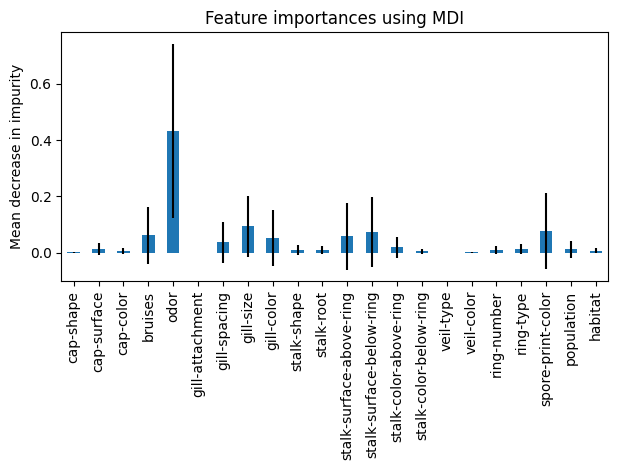

In [13]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=list(train_x.columns.values))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [14]:
forest_importances

cap-shape                   0.001351
cap-surface                 0.013970
cap-color                   0.006699
bruises                     0.061855
odor                        0.433365
gill-attachment             0.000021
gill-spacing                0.036637
gill-size                   0.093957
gill-color                  0.053641
stalk-shape                 0.009643
stalk-root                  0.010192
stalk-surface-above-ring    0.058920
stalk-surface-below-ring    0.073390
stalk-color-above-ring      0.019148
stalk-color-below-ring      0.005132
veil-type                   0.000000
veil-color                  0.001256
ring-number                 0.010171
ring-type                   0.013548
spore-print-color           0.076732
population                  0.012465
habitat                     0.007906
dtype: float64

In [15]:
forest_importances[forest_importances <0.03]

cap-shape                 0.001351
cap-surface               0.013970
cap-color                 0.006699
gill-attachment           0.000021
stalk-shape               0.009643
stalk-root                0.010192
stalk-color-above-ring    0.019148
stalk-color-below-ring    0.005132
veil-type                 0.000000
veil-color                0.001256
ring-number               0.010171
ring-type                 0.013548
population                0.012465
habitat                   0.007906
dtype: float64

# Fit/test added random columns

In [16]:
X = data.data.copy()
y = data.target.copy()

In [17]:
for i in range(10):
    X[f'fake_{i}'] = np.random.rand(len(X))

In [18]:
vectorizer = woe.WOEEncoder(cols=woe_cols)
# vectorizer = preprocessing.OneHotEncoder(handle_unknown='ignore')
label_encoder = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_y = label_encoder.fit_transform(y_train)
test_y = label_encoder.transform(y_test)

unique_classes = set(y_test)
print(f"Unique classes:{unique_classes}")

woe_train_features = vectorizer.fit_transform(X=X_train[woe_cols], y=train_y)
woe_test_features = vectorizer.transform(X=X_test[woe_cols])

original_train_df = X_train.copy()
original_train_df.update(woe_train_features)

original_test_df = X_test.copy()
original_test_df.update(woe_test_features)

train_x = original_train_df.copy()
test_x = original_test_df.copy()
model = ExtraTreesClassifier(n_estimators=16,
                           random_state=42)
model.fit(train_x, train_y)

predictions = model.predict(test_x)
predictions_scores = model.predict_proba(test_x)


acc = accuracy_score(test_y, predictions)
f1 = f1_score(test_y, predictions)
print(f'ACC: {acc}')
print(f'F1: {f1}')
roc = roc_auc_score(test_y, predictions_scores[:,1])
print(f'ROC AUC: {roc}')

Unique classes:{'e', 'p'}
ACC: 1.0
F1: 1.0
ROC AUC: 1.0


In [19]:
train_x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,fake_0,fake_1,fake_2,fake_3,fake_4,fake_5,fake_6,fake_7,fake_8,fake_9
3244,0.028377,-0.648114,0.424059,-1.443871,-3.310305,0.042734,0.299127,-0.774149,-2.072655,-0.179981,...,0.569601,0.331544,0.405793,0.119410,0.973163,0.516532,0.238499,0.393454,0.950834,0.874223
3739,-0.06861,-0.648114,-0.182645,0.90375,4.939531,0.042734,-2.253559,2.164551,-0.14063,0.239992,...,0.205398,0.196173,0.857806,0.847908,0.910900,0.031915,0.579007,0.116692,0.896813,0.857196
2154,-0.06861,-0.648114,0.424059,-1.443871,-3.310305,0.042734,0.299127,-0.774149,-2.072655,-0.179981,...,0.497166,0.035182,0.344867,0.785963,0.281993,0.178704,0.482680,0.623722,0.610173,0.773685
1344,0.028377,0.279566,-0.740344,0.90375,-3.310305,0.042734,-2.253559,-0.774149,-2.072655,-0.179981,...,0.640216,0.239686,0.569341,0.074415,0.412877,0.373902,0.724365,0.716645,0.442995,0.382960
7852,1.022485,0.224147,-0.143424,0.90375,6.050981,0.042734,0.299127,2.164551,7.142767,-0.179981,...,0.917813,0.231981,0.969598,0.671052,0.858364,0.118235,0.760783,0.840572,0.194017,0.702480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,-0.06861,0.224147,-0.143424,0.90375,7.356967,0.042734,0.299127,2.164551,7.142767,-0.179981,...,0.082568,0.556409,0.430002,0.758564,0.839955,0.921154,0.024029,0.515375,0.372525,0.226398
5390,1.022485,0.224147,0.424059,-1.443871,-3.310305,0.042734,0.299127,-0.774149,-1.369819,0.239992,...,0.870000,0.820724,0.516262,0.223370,0.699964,0.219303,0.826416,0.560123,0.849890,0.828132
860,0.028377,0.224147,-0.143424,-1.443871,-5.457615,0.042734,0.299127,-0.774149,-1.369819,0.239992,...,0.816241,0.824935,0.045731,0.550726,0.263574,0.044769,0.702384,0.325588,0.923452,0.255649
7603,1.022485,0.279566,0.424059,0.90375,7.356967,0.042734,0.299127,2.164551,7.142767,-0.179981,...,0.570780,0.580201,0.736403,0.495747,0.474818,0.414905,0.153830,0.733626,0.410587,0.434252


### Feature importance based on mean decrease in impurity

In [20]:
import time
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.002 seconds


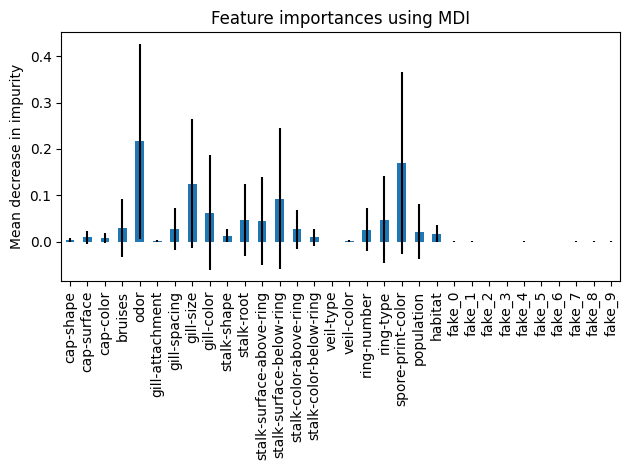

In [21]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=list(train_x.columns.values))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Boruta experiment

In [22]:
from boruta import BorutaPy

In [23]:
X = data.data.copy()
y = data.target.copy()

In [24]:
vectorizer = woe.WOEEncoder(cols=woe_cols)
# vectorizer = preprocessing.OneHotEncoder(handle_unknown='ignore')
label_encoder = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

train_y = label_encoder.fit_transform(y_train)
test_y = label_encoder.transform(y_test)

unique_classes = set(y_test)
print(f"Unique classes:{unique_classes}")

woe_train_features = vectorizer.fit_transform(X=X_train[woe_cols], y=train_y)
woe_test_features = vectorizer.transform(X=X_test[woe_cols])

original_train_df = X_train.copy()
original_train_df.update(woe_train_features)

original_test_df = X_test.copy()
original_test_df.update(woe_test_features)

train_x = original_train_df.copy()
test_x = original_test_df.copy()
model = ExtraTreesClassifier(class_weight='balanced', max_depth=5,n_estimators=16,
                           random_state=42)
# model.fit(train_x, train_y)
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=0)
feat_selector.fit(train_x.values, train_y)

Unique classes:{'e', 'p'}
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	22
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	21
Tentative: 	1
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	21
Tentative: 	0
Rejected: 	1


BorutaPy finished running.

Iteration: 	10 / 100
Confirmed: 	21
Tentative: 	0
Rejected: 	1


BorutaPy(estimator=ExtraTreesClassifier(class_weight='balanced', max_depth=5,
                                        n_estimators=132,
                                        random_state=RandomState(MT19937) at 0x7F25A6695C40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F25A6695C40, verbose=2)

In [25]:
# # Check selected features
# print(feat_selector.support_)
# # Select the chosen features from our dataframe.
# selected = train_x[:, feat_selector.support_]
# print ("")
# print ("Selected Feature Matrix Shape")
# print (selected.shape)

In [26]:
X_selected = feat_selector.transform(train_x.values)

In [27]:
final_features = list()
indexes = np.where(feat_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(train_x.columns.values[x])
print(final_features)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [28]:
set(data.data.columns) - set(final_features)

{'veil-type'}

In [29]:
train_x[final_features]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3244,0.028377,-0.648114,0.424059,-1.443871,-3.310305,0.042734,0.299127,-0.774149,-2.072655,-0.179981,...,-0.804676,-0.739922,0.864718,-5.888988,0.045038,0.106036,-1.295276,-1.918262,-0.413762,-0.353761
3739,-0.06861,-0.648114,-0.182645,0.90375,4.939531,0.042734,-2.253559,2.164551,-0.14063,0.239992,...,-0.804676,-0.739922,-0.389739,-0.408756,0.045038,0.106036,-1.295276,-1.918262,0.936869,-0.353761
2154,-0.06861,-0.648114,0.424059,-1.443871,-3.310305,0.042734,0.299127,-0.774149,-2.072655,-0.179981,...,-0.804676,-0.739922,-0.389739,-5.888988,0.045038,0.106036,-1.295276,-2.033624,-0.413762,-0.353761
1344,0.028377,0.279566,-0.740344,0.90375,-3.310305,0.042734,-2.253559,-0.774149,-2.072655,-0.179981,...,-0.804676,-0.739922,-0.389739,-0.408756,0.045038,0.106036,0.630157,-2.033624,-0.824429,-0.538705
7852,1.022485,0.224147,-0.143424,0.90375,6.050981,0.042734,0.299127,2.164551,7.142767,-0.179981,...,-0.804676,2.825749,-0.389739,-0.408756,0.045038,0.106036,0.630157,1.226019,0.936869,1.009255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,-0.06861,0.224147,-0.143424,0.90375,7.356967,0.042734,0.299127,2.164551,7.142767,-0.179981,...,2.919595,-0.739922,0.864718,-0.408756,0.045038,0.106036,0.630157,1.226019,0.936869,2.121089
5390,1.022485,0.224147,0.424059,-1.443871,-3.310305,0.042734,0.299127,-0.774149,-1.369819,0.239992,...,-0.804676,-0.739922,-0.389739,-4.182961,0.045038,-1.926816,0.630157,1.226019,-1.574839,-4.861923
860,0.028377,0.224147,-0.143424,-1.443871,-5.457615,0.042734,0.299127,-0.774149,-1.369819,0.239992,...,-0.804676,-0.859386,-0.389739,-0.408756,0.045038,0.106036,-1.295276,-2.033624,-0.413762,2.121089
7603,1.022485,0.279566,0.424059,0.90375,7.356967,0.042734,0.299127,2.164551,7.142767,-0.179981,...,-0.804676,-0.739922,0.864718,0.917272,0.045038,0.106036,0.630157,1.226019,0.936869,2.121089


In [30]:
model = ExtraTreesClassifier(class_weight='balanced', max_depth=5,n_estimators=16,
                           random_state=42)
model.fit(train_x[final_features], train_y)

ExtraTreesClassifier(class_weight='balanced', max_depth=5, n_estimators=16,
                     random_state=42)

In [31]:
predictions = model.predict(test_x[final_features])
predictions_scores = model.predict_proba(test_x[final_features])


acc = accuracy_score(test_y, predictions)
f1 = f1_score(test_y, predictions)
print(f'ACC: {acc}')
print(f'F1: {f1}')
roc = roc_auc_score(test_y, predictions_scores[:,1])
print(f'ROC AUC: {roc}')

ACC: 0.999627004848937
F1: 0.999616122840691
ROC AUC: 1.0


In [32]:
import time
start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.002 seconds


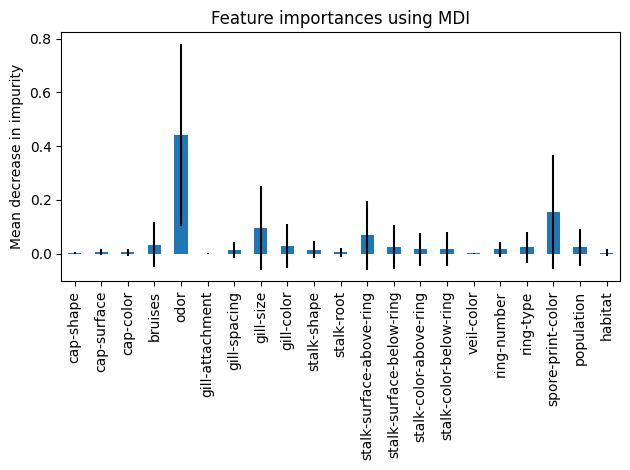

In [33]:
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=final_features)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
len(np.where(data.target == 'good')[0])

0